# 3. Plots for Exploratory data analysis (EDA)

## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]




In [37]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''download iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv(r"../Datasets/iris.csv")



In [38]:
# (Q) how many data-points and features?
print (iris.shape)

(150, 5)


In [39]:
#(Q) What are the column names in our dataset?
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [40]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

# (3.2) 2-D Scatter Plot

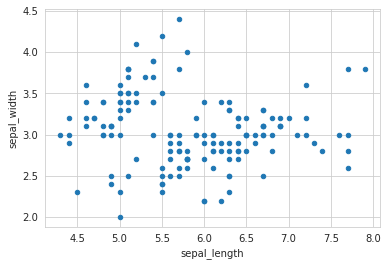

In [41]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

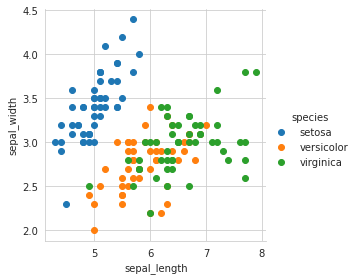

In [42]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

#  (3.3) Pair-plot

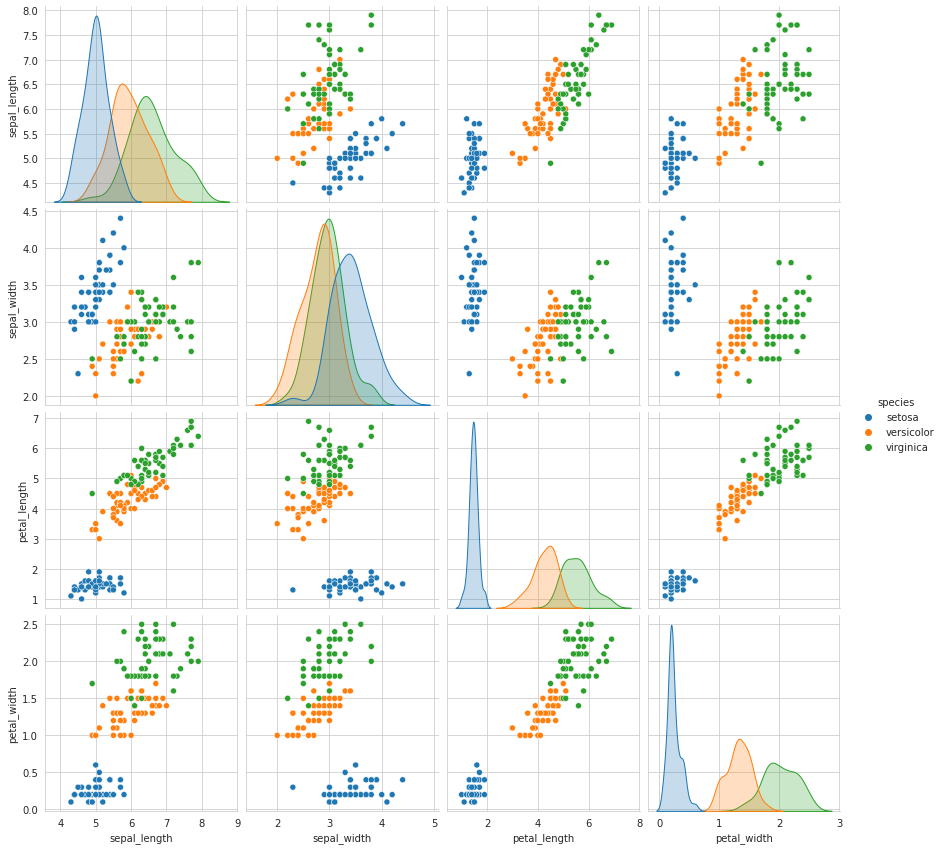

In [43]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()
# NOTE: the diagonal elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (3.4) Histogram, PDF, CDF

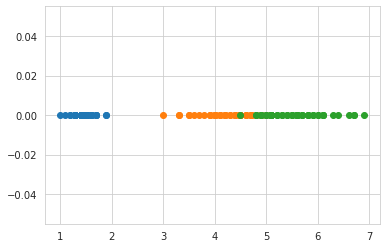

In [44]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

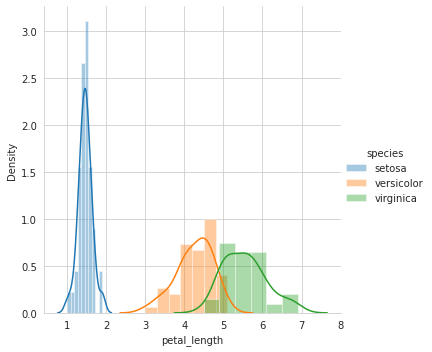

In [45]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();



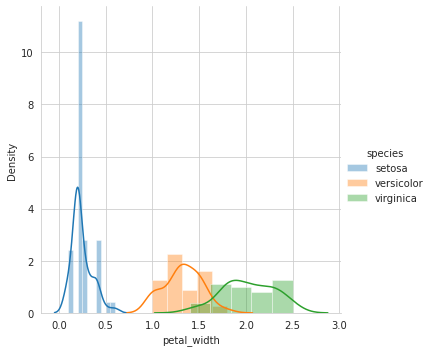

In [46]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

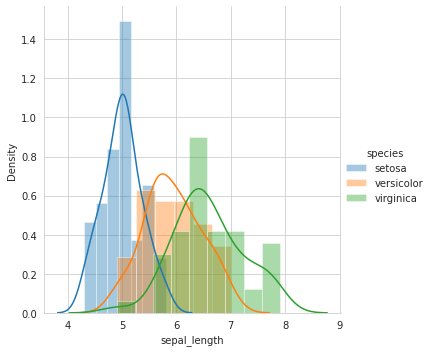

In [47]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

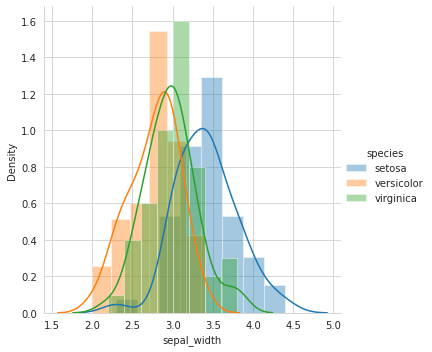

In [48]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


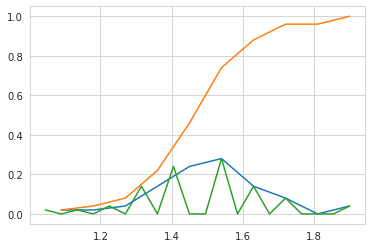

In [49]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


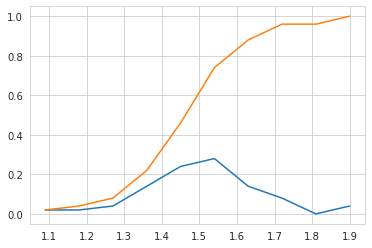

In [50]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


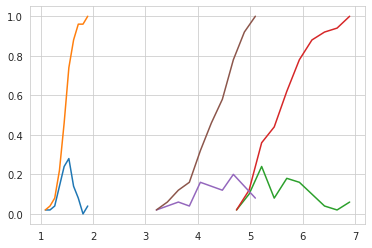

In [51]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# (3.5) Mean, Variance and Std-dev

In [52]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))





Means:
1.464
2.4156862745098038
5.5520000000000005
4.26

Std-dev:
0.17176728442867112
0.546347874526844
0.4651881339845203


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [53]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# (3.7) Box plot and Whiskers

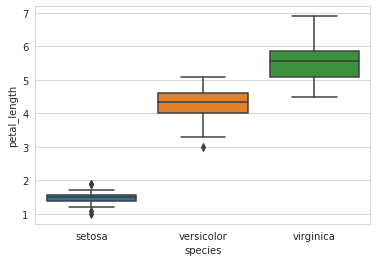

In [54]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

# (3.8) Violin plots

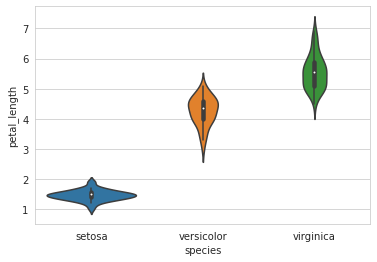

In [55]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

# Task 1:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar analysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, number of features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univariate analysis(PDF, CDF, Boxplot, Violin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. 

# (T1.1) Dataset Statistics and Preprocessing

### Objective: To predict whether a patient will survive or not after 5 years based on the features such as patient's age, operation year and number of positive lymph nodes.

In [56]:
# Load haberman.csv into a pandas dataFrame.
haberman_dataset = pd.read_csv(r"../Datasets/haberman.csv", header = None,  
                               names= ['AGE', 'OPERATION_YEAR', 'POSITIVE_LYMPH_NODES', 'SURVIVAL_STATUS'])
haberman_dataset.head()


,AGE,OPERATION_YEAR,POSITIVE_LYMPH_NODES,SURVIVAL_STATUS
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [57]:
# (Q) how many data-points and features?
print (haberman_dataset.shape)

(306, 4)


**Observation**: The CSV file contains 306 rows and 4 columns.

In [58]:
print(haberman_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AGE                   306 non-null    int64
 1   OPERATION_YEAR        306 non-null    int64
 2   POSITIVE_LYMPH_NODES  306 non-null    int64
 3   SURVIVAL_STATUS       306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


**Observation**:

* There are no missing values in this data set.
* All the columns are of the integer data type.
* The datatype of the status is an integer, which we can convert to a categorical datatype.
* In the status column, the value 1 can be mapped to ‘yes’ which means the patient has survived 5 years or longer. And the value 2 can be mapped to ‘no’ which means the patient died within 5 years.

In [59]:
#mapping the values of 1 and 2 to yes and no respectively and 
#printing the first 5 records from the dataset.

haberman_dataset['SURVIVAL_STATUS'] = haberman_dataset['SURVIVAL_STATUS'].map({1: 'yes', 2: 'no'})
haberman_dataset['SURVIVAL_STATUS'] = haberman_dataset['SURVIVAL_STATUS'].astype('category')
haberman_dataset.head(10)

,AGE,OPERATION_YEAR,POSITIVE_LYMPH_NODES,SURVIVAL_STATUS
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes
5,33,58,10,yes
6,33,60,0,yes
7,34,59,0,no
8,34,66,9,no
9,34,58,30,yes


In [60]:
# (Q) how many data-points for each class?
# gives each count of the status type
haberman_dataset['SURVIVAL_STATUS'].value_counts()

yes    225
no      81
Name: SURVIVAL_STATUS, dtype: int64

**Observation**:

The value_counts() function tells how many data points for each class are present. Here, it tells how many patients survived and how many did not survive.
Out of 306 patients, 225 patients survived and 81 did not.

In [61]:
print(haberman_dataset.iloc[:,-1].value_counts(normalize = True))

yes    0.735294
no     0.264706
Name: SURVIVAL_STATUS, dtype: float64


**Observation**:

* We can observe that our target model is imbalanced as it contains 73% (225/306) values 'yes' and only 27% (81/306) values 'no'.
* Since dataset consists of only 306 records.

In [62]:
#survival_status_yes dataframe stores all the records where status is yes
survival_status_yes = haberman_dataset[haberman_dataset['SURVIVAL_STATUS']== 'yes']
survival_status_yes.describe()

,AGE,OPERATION_YEAR,POSITIVE_LYMPH_NODES
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [63]:
#survival_status_no dataframe stores all the records where status is no
survival_status_no = haberman_dataset[haberman_dataset['SURVIVAL_STATUS'] == 'no']
survival_status_no.describe()

,AGE,OPERATION_YEAR,POSITIVE_LYMPH_NODES
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


**Observation**:

* The mean age and the year in which the patients got operated are almost similar of both the classes, while the mean of the nodes of both the classes differs by 5 units approximately.
* The positive lymph nodes of patients who survived are less when compared to patients who did not survive.

# (T1.2) Univariate Analysis

## (T1.21) One Dimensional Scatter Plot

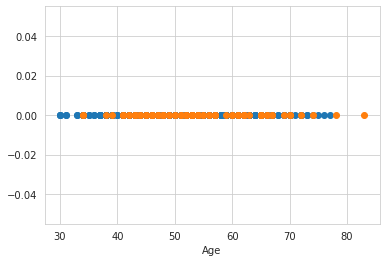

In [64]:
sns.set_style('whitegrid')
one= haberman_dataset.loc[haberman_dataset['SURVIVAL_STATUS']== 'yes']
two= haberman_dataset.loc[haberman_dataset['SURVIVAL_STATUS']== 'no']
plt.plot(one['AGE'], np.zeros_like(one['AGE']), 'o', label= "SURVIVAL_STATUS, yes")
plt.plot(two['AGE'], np.zeros_like(two['AGE']), 'o', label= "SURVIVAL_STATUS, no")
plt.xlabel('Age')
plt.show()

## (T1.22) Probability Density Function(PDF)

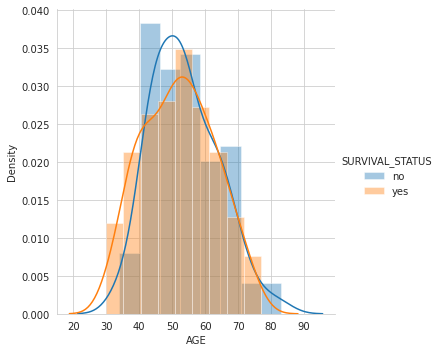

In [65]:
sns.FacetGrid(haberman_dataset,hue='SURVIVAL_STATUS',height = 5)\
 .map(sns.distplot,"AGE")\
 .add_legend();
plt.show()

**Observation**:

* Major overlapping is observed, which tells us that survival chances are irrespective of a person’s age.
* Although there is overlapping we can vaguely tell that people whose age is in the range 30–40 are more likely to survive, and 40–60 are less likely to survive. * * While people whose age is in the range 60–75 have equal chances of surviving and not surviving.
* From the above figure, we can't come to an conclusion. We cannot decide the survival chances of a patient just by considering the age parameter.

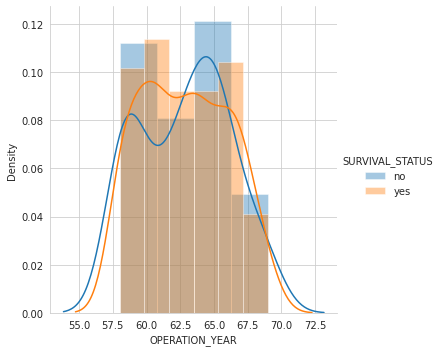

In [66]:
sns.FacetGrid(haberman_dataset,hue='SURVIVAL_STATUS',height = 5)\
 .map(sns.distplot,"OPERATION_YEAR")\
 .add_legend();
plt.show()

**Observation**:

* There is major overlapping observed as compared to "AGE" parameter. This graph only tells how many of the operations were successful and how many weren’t. This cannot be a parameter to decide the patient’s survival chances.
* However, it can be observed that in the years 1960 and 1965 there were more unsuccessful operations.

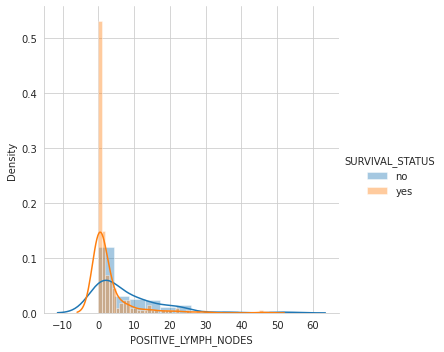

In [67]:
sns.FacetGrid(haberman_dataset,hue='SURVIVAL_STATUS',height = 5)\
 .map(sns.distplot,"POSITIVE_LYMPH_NODES")\
 .add_legend();
plt.show()

**Observation**:

Patients with no nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25 or more nodes.

## (T1.23) Cumulative Distribution Function(CDF)

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
***********************************************************
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


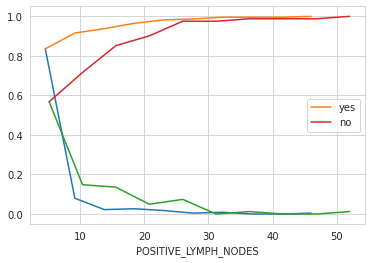

In [68]:
counts1, bin_edges1 = np.histogram(survival_status_yes['POSITIVE_LYMPH_NODES'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'yes')
plt.xlabel('POSITIVE_LYMPH_NODES')
print("***********************************************************")
counts2, bin_edges2 = np.histogram(survival_status_no['POSITIVE_LYMPH_NODES'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'no')
plt.xlabel('POSITIVE_LYMPH_NODES')
plt.legend()
plt.show()

**Observation**: 83.55% of the patients who have survived had nodes in the range of 0 – 4.6

## (T1.24) Box Plot and Whiskers

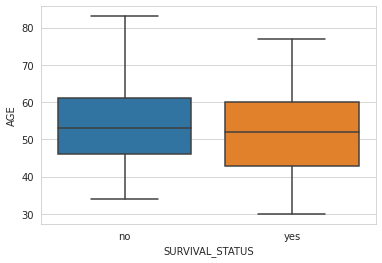

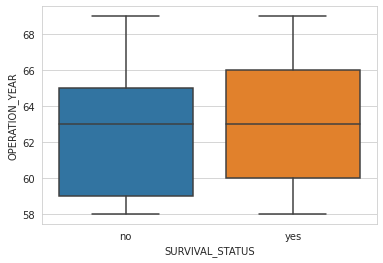

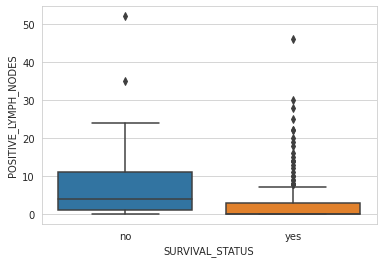

In [69]:
sns.boxplot(x='SURVIVAL_STATUS',y='AGE',data=haberman_dataset)
plt.show()
sns.boxplot(x='SURVIVAL_STATUS',y='OPERATION_YEAR',data=haberman_dataset)
plt.show()
sns.boxplot(x='SURVIVAL_STATUS',y='POSITIVE_LYMPH_NODES',data=haberman_dataset)
plt.show()

## (T1.25) Violin Plots

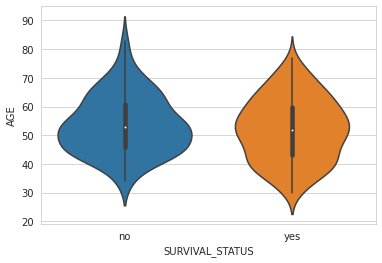

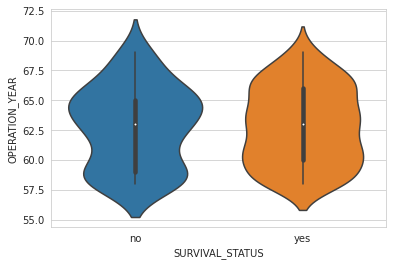

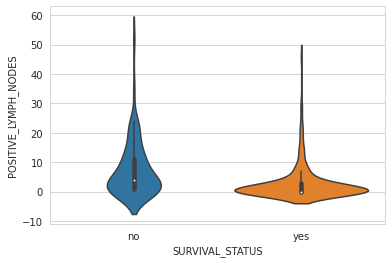

In [70]:
sns.violinplot(x="SURVIVAL_STATUS",y="AGE",data = haberman_dataset,height = 10)
plt.show()
sns.violinplot(x="SURVIVAL_STATUS",y="OPERATION_YEAR",data = haberman_dataset,height = 10)
plt.show()
sns.violinplot(x="SURVIVAL_STATUS",y="POSITIVE_LYMPH_NODES",data = haberman_dataset,height = 10)
plt.show()

**Observations**:

* Patients with more than 1 nodes are not likely to survive. More the number of nodes, lesser the survival chances.
* A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had no positive axillary nodes died within 5 years of operation, thus an absence of positive axillary nodes cannot always guarantee survival.
* There were comparatively more people who got operated in the year 1965 did not survive for more than 5 years.
* There were comparatively more people in the age group 45 to 65 who did not survive. Patient age alone is not an important parameter in determining the survival of a patient.
* The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and thus it is difficult to set a threshold to classify both classes of patients.

# (T1.3) Bi-Variate Analysis

## (T1.31) Two Dimensional Scatter Plot

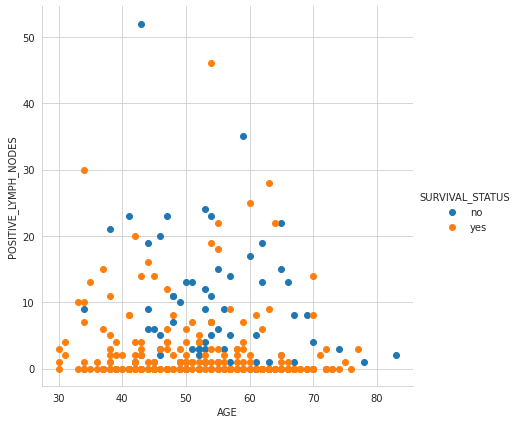

In [71]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman_dataset, hue= 'SURVIVAL_STATUS', size= 6).map(plt.scatter,'AGE','POSITIVE_LYMPH_NODES').add_legend()

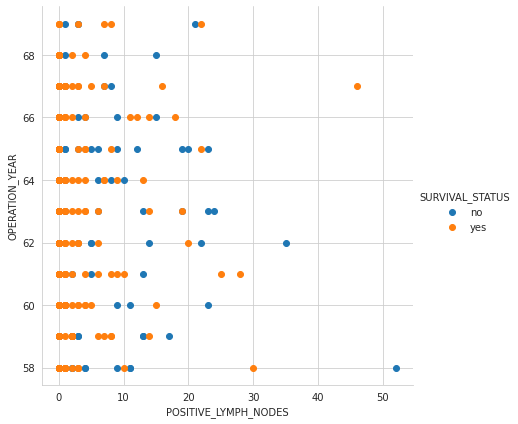

In [72]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman_dataset, hue= 'SURVIVAL_STATUS', size= 6).map(plt.scatter,'POSITIVE_LYMPH_NODES','OPERATION_YEAR').add_legend()

## (T1.32) Pair-plot

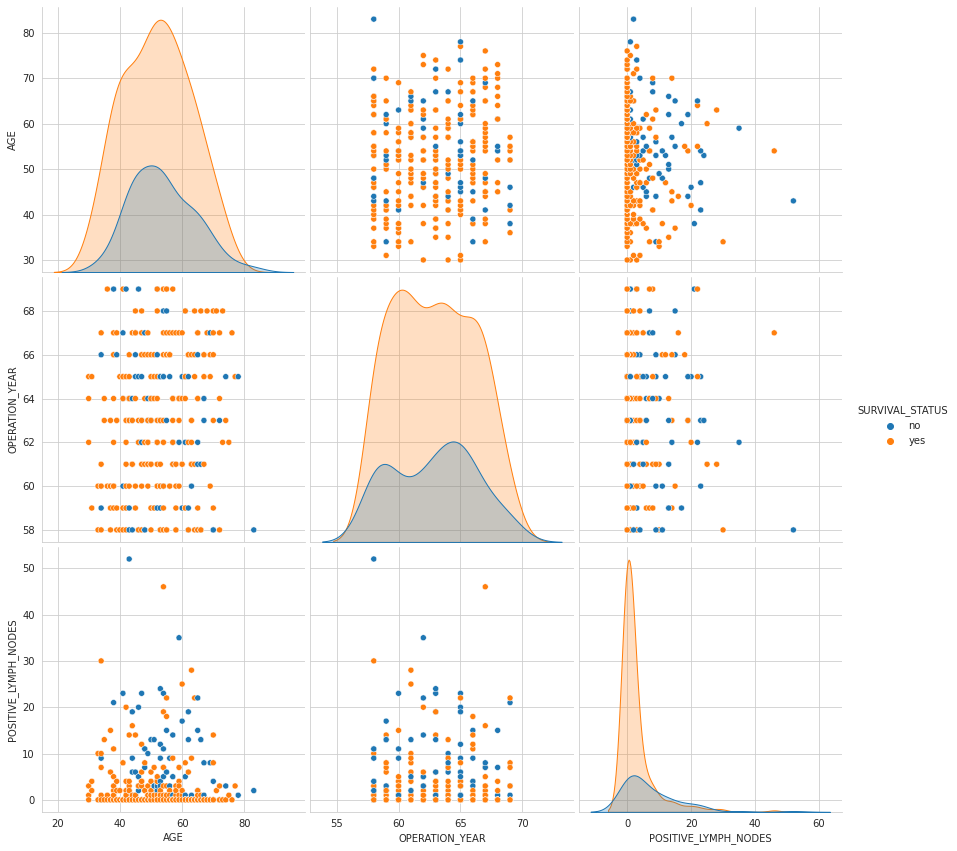

In [73]:
sns.pairplot(haberman_dataset, hue= 'SURVIVAL_STATUS', height= 4)
plt.show()

**Observation**: The plot between operation year and lymph nodes is comparatively better.

# Conclusion:

* Patient’s age and operation year alone are not deciding factors for his/her survival. Yet, people less than 35 years have more chance of survival.

* Survival chance is inversely proportional to the number of positive axillary nodes. We also saw that the absence of positive axillary nodes cannot always guarantee survival.

* The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is less and imbalanced.